
# 🎬 Movie Genre Classification

We will:
- Upload the zip file manually(You can download dataset from "https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb" and rename(if needed) as Genre Classification Dataset
)
- Parse and preprocess the text
- Convert to TF-IDF vectors
- Train a Logistic Regression classifier
- Evaluate performance and check feature importance


In [1]:

from google.colab import files
uploaded = files.upload()  # Upload your ZIP file manually (e.g., genre-classification-dataset-imdb.zip)


Saving archive.zip to archive.zip


In [2]:

!unzip archive.zip


Archive:  archive.zip
  inflating: Genre Classification Dataset/description.txt  
  inflating: Genre Classification Dataset/test_data.txt  
  inflating: Genre Classification Dataset/test_data_solution.txt  
  inflating: Genre Classification Dataset/train_data.txt  


In [3]:

import pandas as pd

data = []
with open("Genre Classification Dataset/train_data.txt", "r", encoding="utf-8") as f:
    for line in f:
        parts = line.strip().split(" ::: ")
        if len(parts) == 4:
            _, title, genre, plot = parts
            data.append({'title': title, 'genre': genre, 'plot': plot})

df = pd.DataFrame(data)
df.head()


,title,genre,plot
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [4]:

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['clean_plot'] = df['plot'].apply(preprocess)
df[['genre', 'clean_plot']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,genre,clean_plot
0,drama,listening conversation doctor parent yearold o...
1,thriller,brother sister past incestuous relationship cu...
2,adult,bus empty student field trip museum natural hi...
3,drama,help unemployed father make end meet edith twi...
4,drama,film title refers unrecovered body ground zero...


In [5]:

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = vectorizer.fit_transform(df['clean_plot'])


In [6]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['genre'])


In [7]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [9]:

from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 0.5813889145070552
              precision    recall  f1-score   support

      action       0.52      0.27      0.35       263
       adult       0.79      0.20      0.31       112
   adventure       0.48      0.17      0.25       139
   animation       0.53      0.08      0.13       104
   biography       0.00      0.00      0.00        61
      comedy       0.52      0.60      0.55      1443
       crime       0.22      0.02      0.03       107
 documentary       0.68      0.84      0.75      2659
       drama       0.54      0.78      0.64      2697
      family       0.44      0.09      0.15       150
     fantasy       0.00      0.00      0.00        74
   game-show       0.95      0.47      0.63        40
     history       0.00      0.00      0.00        45
      horror       0.63      0.56      0.60       431
       music       0.63      0.50      0.56       144
     musical       0.25      0.02      0.04        50
     mystery       0.00      0.00      0.00        5

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:

import numpy as np

feature_names = vectorizer.get_feature_names_out()
for i, genre in enumerate(label_encoder.classes_):
    top = np.argsort(model.coef_[i])[-10:] if model.coef_.shape[0] > 1 else np.argsort(model.coef_[0])[-10:]
    print(f"Top words for '{genre}':")
    print([feature_names[j] for j in top])


Top words for 'action':
['gang', 'killed', 'police', 'revenge', 'singh', 'gangster', 'martial', 'action', 'assassin', 'fight']
Top words for 'adult':
['adult', 'lesbian', 'fantasy', 'sexy', 'bound', 'gagged', 'scene', 'hot', 'sexual', 'sex']
Top words for 'adventure':
['blonde', 'lovely', 'native', 'ship', 'tied', 'bound', 'gagged', 'jungle', 'adventure', 'bondage']
Top words for 'animation':
['christmas', 'friend', 'magical', 'animal', 'cartoon', 'evil', 'monster', 'animation', 'adventure', 'animated']
Top words for 'biography':
['thomas', 'story', 'legend', 'documentary', 'biography', 'great', 'life', 'interview', 'age', 'film']
Top words for 'comedy':
['problem', 'decides', 'comic', 'job', 'sitcom', 'funny', 'comedic', 'sketch', 'hilarious', 'comedy']
Top words for 'crime':
['robbery', 'killed', 'bos', 'detective', 'drug', 'criminal', 'murder', 'case', 'police', 'crime']
Top words for 'documentary':
['programme', 'document', 'look', 'community', 'film', 'filmmaker', 'interview', 'ye

<Figure size 800x600 with 0 Axes>

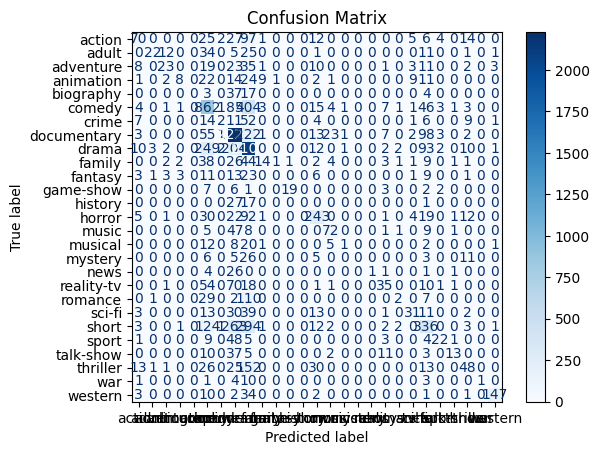

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

plt.figure(figsize=(8,6))
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


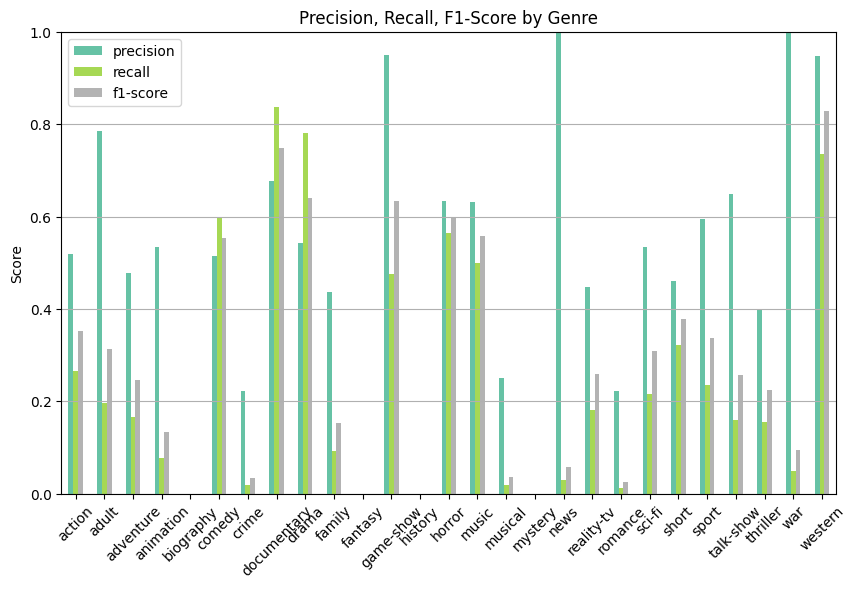

In [12]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot Precision, Recall, F1-Score for each genre
report_df[:-3][['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10,6), colormap='Set2')
plt.title("Precision, Recall, F1-Score by Genre")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


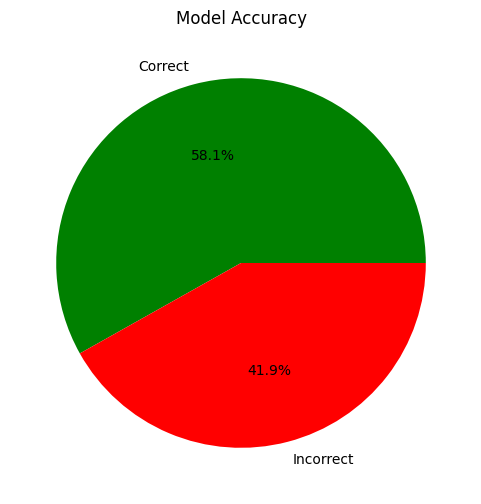

In [13]:
accuracy = accuracy_score(y_test, y_pred)

# Simple pie chart
plt.figure(figsize=(6,6))
plt.pie([accuracy, 1-accuracy], labels=['Correct', 'Incorrect'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title("Model Accuracy")
plt.show()


